# I: Basics of quantum information

Testing out and playing with basic operations in Qiskit, following IBM course in title.

### Basic setup and playing with single systems

In [1]:
from qiskit import __version__

In [2]:
print(__version__)

2.2.1


In [3]:
import numpy as np

In [6]:
from qiskit.quantum_info import Statevector

In [7]:
u = Statevector( [1,1]/np.sqrt(2) )

In [9]:
display(u.draw("latex"))

<IPython.core.display.Latex object>

Try a measurement, then try lots of measurements

In [114]:
outcome, state = u.measure()
print("Measured result: ",outcome)
print("State collapses to:")
display(state.draw("latex"))

Measured result:  1
State collapses to:


<IPython.core.display.Latex object>

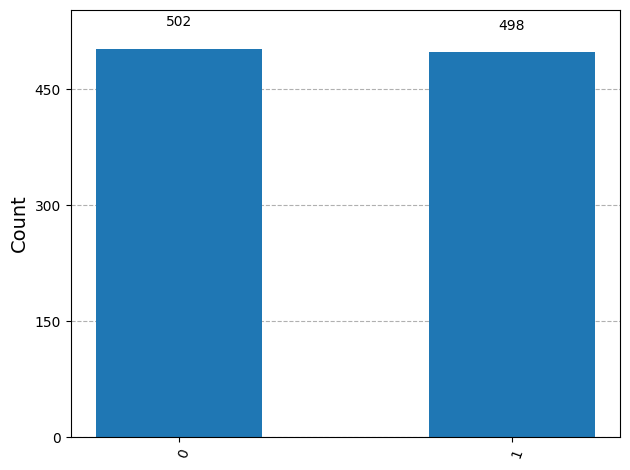

In [16]:
from qiskit.visualization import plot_histogram

stats = u.sample_counts(1000)
plot_histogram(stats)


### Multi-qubit exploration

In [17]:
from qiskit.quantum_info import Operator

In [19]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")
psi = zero ^ one
display(psi.draw("latex"))

<IPython.core.display.Latex object>

In [21]:
plus = Statevector.from_label("+")
display(plus.draw("latex"))
minus = Statevector.from_label("-")
display(minus.draw("latex"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [22]:
display((plus^one).draw("latex"))

<IPython.core.display.Latex object>

In [24]:
H = Operator.from_label("H")
display(H.draw("latex"))

<IPython.core.display.Latex object>

In [118]:
I = Operator.from_label("I")
X = Operator.from_label("X")
display((I^X).draw("latex"))
display((X^I).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Recall our standard ordered basis for 2 qubits is:
$$ |00\rangle, \;\; |01\rangle, \;\; |10\rangle, \;\; |11\rangle $$
So the first matrix above swaps
$$ |00\rangle \leftrightarrow |01\rangle, \;\;\;\; |10\rangle \leftrightarrow |11\rangle $$
which is NOT on leftmost qubit, as expected.

Similarly, the second matrix swaps
$$ |00\rangle \leftrightarrow |10\rangle, \;\;\;\; |01\rangle \leftrightarrow |11\rangle $$
which is NOT on rightmost qubit.

We see below how Hadamard operator is spread across the qubits if we tensor with identity on left/right.


In [120]:
display((I^H).draw("latex"))
display((H^I).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

So $H\otimes Id$ should send (plus^one) to (zero^one).  Check:

In [39]:
display((plus^one).evolve(H^Id).draw("latex"))

<IPython.core.display.Latex object>

### Let's play with circuits.  
We know the Hadamard operator is self inverse:
$$ |0\rangle \mapsto |+\rangle \mapsto |0\rangle, \;\;\;\; |1\rangle \mapsto |-\rangle \mapsto |1\rangle. $$
We can check this explicitly.

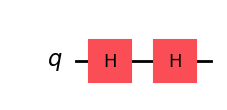

<IPython.core.display.Latex object>

In [121]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.h(0)

display(circuit.draw(output="mpl"))
display(Operator.from_circuit(circuit).draw("latex"))

### Partial measurements of state

In [93]:
#Modified from example to work with different amplitudes

#Prepare 3 qubit state
v = (Statevector([0, 1, 0, 0, 0, 0, 0, 0]) / np.sqrt(6) 
     + Statevector([0, 0, 1, 0, 0, 0, 0, 0])/ np.sqrt(3)
     + Statevector([0, 0, 0, 0, 1, 0, 0, 0])/ np.sqrt(2)
    )
display(v.draw("latex"))


#Measure first (rightmost!) qubit
vresult1, vnew1 = v.measure([0])
print("Result of first (rightmost) measurement:",vresult1)
print("New state:")
display(vnew1.draw("latex"))

#Measure second (middle!) qubit
vresult2, vnew2 = vnew1.measure([1])
print("Result of second (middle) measurement:",vresult2)
print("New state:")
display(vnew2.draw("latex"))



<IPython.core.display.Latex object>

Result of first (rightmost) measurement: 0
New state:


<IPython.core.display.Latex object>

Result of second (middle) measurement: 1
New state:


<IPython.core.display.Latex object>

### Check HSH is square root of X (not gate) using circuits


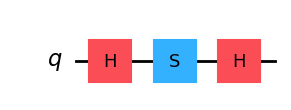

<IPython.core.display.Latex object>

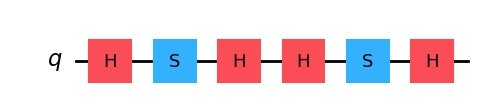

<IPython.core.display.Latex object>

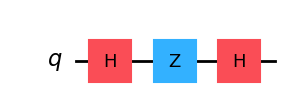

<IPython.core.display.Latex object>

In [124]:

HSH = QuantumCircuit(1)

HSH.h(0)
HSH.s(0)
HSH.h(0)

display(HSH.draw(output="mpl"))
display(Operator.from_circuit(HSH).draw("latex"))

HSH2 = HSH.compose(HSH)

display(HSH2.draw(output="mpl"))
display(Operator.from_circuit(HSH2).draw("latex"))




Note $H$ is self-inverse, so we can simplify the second circuit by removing both middle $H$'s

Then we have two $S$ gates in succession, so $|1\rangle$ is multiplied by $i^2=-1$.
So replace both $S$ gates by a single $Z$ gate



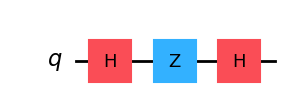

<IPython.core.display.Latex object>

In [125]:
c2 = QuantumCircuit(1)

c2.h(0)
c2.z(0)
c2.h(0)

display(c2.draw(output="mpl"))
display(Operator.from_circuit(c2).draw("latex"))


### Teleportation

Code up the circuit for practice.
